<a href="https://colab.research.google.com/github/plmllab/machine-learning-practice/blob/main/Logistic_Regression_Junseo_Lee_September_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

#Data

##Dataset Info



See also:

  http://www.cs.wisc.edu/~olvi/uwmp/mpml.html

  http://www.cs.wisc.edu/~olvi/uwmp/cancer.html

Results:

1. Predicting field 2, diagnosis: B = benign, M = malignant
2. Sets are linearly separable using all 30 input features
3. Best predictive accuracy obtained using one separating plane in the 3-D 	space of Worst Area, Worst Smoothness and Mean Texture.  Estimated accuracy 97.5% using repeated 10-fold crossvalidations.  Classifier has correctly diagnosed 176 consecutive new patients as of November 1995.

4. Relevant information
	- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

	- Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree.  Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

	- The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

	- This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

5. Number of instances: 569

6. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

7. Attribute information

	1) ID number

	2) Diagnosis (M = malignant, B = benign)

	3-32) Ten real-valued features are computed for each cell nucleus:
		a) radius (mean of distances from center to points on the perimeter)
		b) texture (standard deviation of gray-scale values)
		c) perimeter
		d) area
		e) smoothness (local variation in radius lengths)
		f) compactness (perimeter^2 / area - 1.0)
		g) concavity (severity of concave portions of the contour)
		h) concave points (number of concave portions of the contour)
		i) symmetry
		j) fractal dimension ("coastline approximation" - 1)

	- Several of the papers listed above contain detailed descriptions of how these features are computed.

	- The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

	- All feature values are recoded with four significant digits.

8. Missing attribute values: none

9. Class distribution: 357 benign, 212 malignant

##Dataset Import



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
with open('/content/drive/MyDrive/Dataset/wdbc.csv') as dataset:
  df = pd.read_csv(dataset)

# Delete the ID Column
df.drop('ID', axis=1, inplace=True)

df

,Diagnosis,Radius 1,Texture 1,Perimeter 1,Area 1,Smoothness 1,Compactness 1,Concavity 1,Concave_points 1,Symmetry 1,...,Radius 3,Texture 3,Perimeter 3,Area 3,Smoothness 3,Compactness 3,Concavity 3,Concave_Points 3,Symmetry 3,Fractal_Dimension 3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.describe()

,Radius 1,Texture 1,Perimeter 1,Area 1,Smoothness 1,Compactness 1,Concavity 1,Concave_points 1,Symmetry 1,Fractal_Dimension 1,...,Radius 3,Texture 3,Perimeter 3,Area 3,Smoothness 3,Compactness 3,Concavity 3,Concave_Points 3,Symmetry 3,Fractal_Dimension 3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


##Train-Test Split

In [ ]:
# Import the Sci-Kit learn library
from sklearn.model_selection import train_test_split
# Import Numpy
import numpy as np

In [ ]:
# Separate the Feature Columns (X) and the Target Column (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis'].map({'B': 0, 'M': 1})

# Perform the Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Convert Pandas Dataframes into Numpy Arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test  = np.array(X_test)
y_test = np.array(y_test)

# Logistic Regression Functions

## Sigmoid Function

$$g(z)=\frac{1}{1+e^{-z}}$$

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1/(1+np.exp(-z))

    return g

## Cost Function for Logistic Regression with Regularization

For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $$



Including the regularization term, which is    <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span>
encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.

In [ ]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost
    """

    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar

    cost = cost/m                                                      #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar

    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

## Gradient with Regularization



The gradient of the regularized cost function has two components. The first, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ is a scalar, the other is a vector with the same shape as the parameters $\mathbf{w}$, where the $j^\mathrm{th}$ element is defined as follows:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$


In [ ]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                            #(n,)
    dj_db = 0.0                                       #scalar

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

# Model Training - Parameter Optimization

##Gradient Descent

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # Number of training examples
    m = len(X_train)

    for i in range(num_iters):

      # Calculate the Gradient and Update the Parameters
      dj_db, dj_dw= gradient_function(X, y, w_in, b_in, lambda_)

      # Update Parameters using w, b, alpha and gradient
      w_in = w_in - alpha * dj_dw
      b_in = b_in - alpha * dj_db

    return w_in, b_in

In [ ]:
w_param, b_param = gradient_descent(X_train, y_train, np.zeros((30,)), 0, compute_cost_logistic_reg, compute_gradient_logistic_reg, 0.0001, 200, 200)

In [ ]:
w_param

array([-2.06137331e-02, -3.89502374e-02, -1.25624632e-01, -1.40212449e-01,
       -2.11758597e-04, -5.83155867e-05,  1.32378852e-04,  7.10833358e-05,
       -4.12639352e-04, -1.61958936e-04, -8.90544957e-05, -3.03051853e-03,
       -4.69690339e-04,  4.66717884e-02, -1.74210458e-05, -3.08328012e-05,
       -3.22701871e-05, -1.23869398e-05, -4.90516175e-05, -8.38948485e-06,
       -2.01386202e-02, -4.96148512e-02, -1.22076429e-01,  1.42124862e-01,
       -2.78615916e-04, -8.21213117e-05,  1.49808072e-04,  3.03757518e-05,
       -5.90600176e-04, -1.83153707e-04])

In [ ]:
b_param

-0.002617835459720702

## Best Threshold using AUROC

In [ ]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

In [ ]:
def predict(data, param, bias):
  m, n = data.shape
  pred = []
  for i in range(m):
    f_wb_i = sigmoid(np.dot(X_test[i], param) + bias)
    pred.append(f_wb_i)

  return np.array(pred)

In [ ]:
y_pred = predict(X_test, w_param, b_param)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auroc = auc(fpr, tpr)

In [ ]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.00934579,
       0.00934579, 0.01869159, 0.01869159, 0.03738318, 0.03738318,
       0.09345794, 0.09345794, 0.21495327, 0.21495327, 0.27102804,
       0.27102804, 0.43925234, 0.43925234, 0.44859813, 0.44859813,
       0.56074766, 0.56074766, 0.70093458, 0.70093458, 0.72897196,
       0.72897196, 0.74766355, 0.74766355, 0.75700935, 0.75700935,
       1.        ])

In [ ]:
tpr

array([0.      , 0.3125  , 0.359375, 0.71875 , 0.71875 , 0.734375,
       0.734375, 0.8125  , 0.8125  , 0.828125, 0.828125, 0.859375,
       0.859375, 0.875   , 0.875   , 0.890625, 0.890625, 0.90625 ,
       0.90625 , 0.921875, 0.921875, 0.9375  , 0.9375  , 0.953125,
       0.953125, 0.96875 , 0.96875 , 0.984375, 0.984375, 1.      ,
       1.      ])

In [ ]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.93828919e-01,
       9.91833679e-01, 9.90603014e-01, 9.73255580e-01, 4.30526502e-01,
       2.44772158e-01, 2.37860618e-01, 1.32850623e-01, 1.08350828e-01,
       2.10897014e-02, 2.00539538e-02, 9.46250603e-03, 7.98369290e-03,
       5.43555764e-04, 5.18913262e-04, 4.24703060e-04, 3.21147846e-04,
       1.09928356e-04, 1.08332621e-04, 2.77871406e-05, 2.54180418e-05,
       2.04481245e-05, 1.94228696e-05, 1.42359008e-05, 1.40814629e-05,
       1.34592689e-05, 1.25063961e-05, 4.87026975e-08])

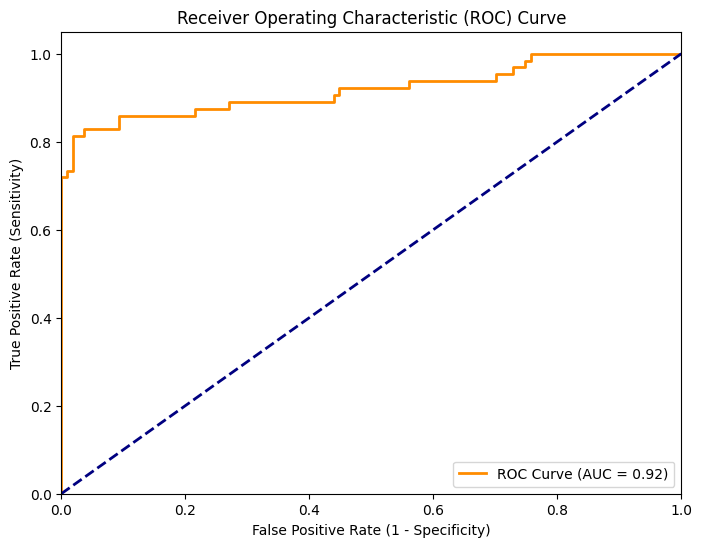

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate Youden's Index (J) for each threshold
J = tpr - fpr

# Find the threshold that maximizes Youden's Index
best_threshold_index = np.argmax(J)
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)
print("Maximum Youden's Index (J):", J[best_threshold_index])
print("AUROC:", auroc)

Best Threshold: 0.430526501765474
Maximum Youden's Index (J): 0.7938084112149533
AUROC: 0.9188084112149533


##Model Evaluation

In [ ]:
def accuracy(data, target, threshold, param, bias):
  m, n = data.shape
  score = 0
  for i in range(m):
    f_wb_i = sigmoid(np.dot(data[i], param) + bias)
    label = lambda x: 0 if x < threshold else 1
    if label(f_wb_i) == target[i]:
      score += 1
    else:
      score += 0
  accuracy = score/m
  return accuracy

In [ ]:
accuracy = accuracy(X_test, y_test, 0.42958401647871786, w_param, b_param)
print(accuracy)

0.9181286549707602


In [ ]:
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 91.81%


# Logistic Regression Using Sci-Kit Learn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', class_report)

Accuracy: 0.9298245614035088
Confusion Matrix:
 [[105   2]
 [ 10  54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       107
           1       0.96      0.84      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171

